In [1]:
#import libraries 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic_dataset= pd.read_csv(r"tested.csv")
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#PASSENGERID--just an ID, no meaning for survival
#name---unique text;only title part could matte, but not now
#ticket--random string, doesnt show survival
#cabin--80% missing not useful
titanic_dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [4]:
titanic_dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [6]:
#handling missing values
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
#age---332
#fare---1
titanic_dataset["Age"].fillna(titanic_dataset["Age"].median())
titanic_dataset["Fare"].fillna(titanic_dataset["Fare"].median())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [10]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
#categorical to numbers---mls do not get text gets only numbers
titanic_dataset["Sex"]= titanic_dataset["Sex"].map({"male":0,"female":1})
titanic_dataset["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [12]:
titanic_dataset= pd.get_dummies(titanic_dataset, columns=['Embarked'], drop_first=True)


In [ ]:
#pd.get_dummies() → creates the new binary columns.
#columns=['Embarked'] → tells pandas which column to encode.
#drop_first=True → drops one of the dummy columns (to prevent multicollinearity — where one column can be predicted from the others).
#So if we drop Embarked_S, the model can still infer it:
#If C = 0 and Q = 0 → must be S.

titanic_dataset.info()
titanic_dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        418 non-null    float64
 7   Embarked_Q  418 non-null    bool   
 8   Embarked_S  418 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 23.8 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,True,False
1,1,3,1,47.0,1,0,7.0000,False,True
2,0,2,0,62.0,0,0,9.6875,True,False
3,0,3,0,27.0,0,0,8.6625,False,True
4,1,3,1,22.0,1,1,12.2875,False,True


In [14]:
#split the data into x and y
# x --- input features(all columns except survived)
# y --- target feature(survived column)
X= titanic_dataset.drop("Survived", axis=1)
y= titanic_dataset["Survived"]

This line splits your dataset into two parts:

Training set → used to teach the model (what patterns to learn)

Testing set → used to check how well the model performs on new, unseen data
art	Variable Name	What It Contains	Used For
Training features	X_train	The independent variables (like Age, Sex, Pclass, etc.) for training	Model learning
Testing features	X_test	The independent variables for testing	Evaluation
Training labels	y_train	The Survived column (0/1) for training	Model learning
Testing labels	y_test	The Survived column (0/1) for testing	Evaluation
----
test_size=0.2
Means 20% of the data goes to the test set

The remaining 80% is used to train the model

You can change this (e.g., test_size=0.3 for a 70/30 split), but 80/20 is the most common.
ets a seed for the random split, so you get the same split every time you run the code.

If you don’t set it, every run will create a different train/test split.
If you train and test on the same data:

The model will memorize answers instead of learning patterns.

You’ll get misleadingly high accuracy.

By splitting, you test your model on data it hasn’t seen, which shows how well it will perform in the real world.



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
y.value_counts(normalize=True)


Survived
0    0.636364
1    0.363636
Name: proportion, dtype: float64

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [23]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)


In [24]:
model.fit(X_train_balanced, y_train_balanced)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred = model.predict(X_test_scaled)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



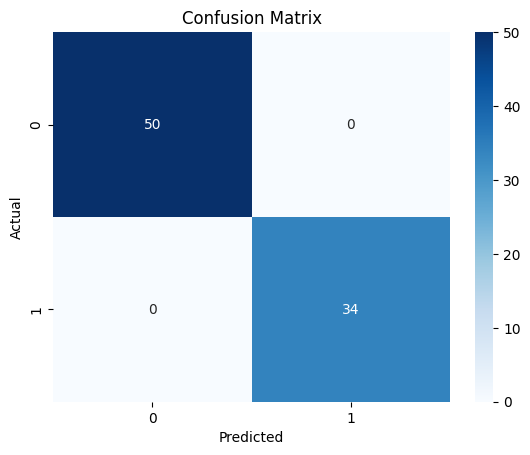

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
import joblib

joblib.dump(model, "titanic_survival_model.pkl")


['titanic_survival_model.pkl']

In [29]:
model = joblib.load("titanic_survival_model.pkl")


In [31]:
new_passenger = pd.DataFrame([{
    'Pclass': 2,
    'Sex': 1,          # 1 = Female
    'Age': 25,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 30.0,
    'Embarked_Q': 0,
    'Embarked_S': 1
}])


In [32]:
new_passenger_scaled = scaler.transform(new_passenger)


In [33]:
prediction = model.predict(new_passenger_scaled)


In [34]:
if prediction[0] == 1:
    print("✅ Likely to Survive")
else:
    print("❌ Not Likely to Survive")


✅ Likely to Survive


In [36]:
import pandas as pd

def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    """
    Predict whether a passenger is likely to survive using the trained Titanic model.
    Arguments:
        Pclass (int): Passenger class (1, 2, or 3)
        Sex (str): 'male' or 'female'
        Age (float): Age in years
        SibSp (int): Number of siblings/spouses aboard
        Parch (int): Number of parents/children aboard
        Fare (float): Passenger fare
        Embarked (str): 'S', 'C', or 'Q'
    """

    # Convert Sex to numeric
    sex_num = 1 if Sex.lower() == 'female' else 0

    # One-hot encode Embarked
    embarked_q = 1 if Embarked.upper() == 'Q' else 0
    embarked_s = 1 if Embarked.upper() == 'S' else 0

    # Create dataframe with correct columns
    passenger = pd.DataFrame([{
        'Pclass': Pclass,
        'Sex': sex_num,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Embarked_Q': embarked_q,
        'Embarked_S': embarked_s
    }])

    # Scale data using the existing scaler
    passenger_scaled = scaler.transform(passenger)

    # Predict using the trained model
    prediction = model.predict(passenger_scaled)[0]
    probability = model.predict_proba(passenger_scaled)[0][1]

    # Return readable output
    if prediction == 1:
        result = f"✅ Likely to Survive (Probability: {probability:.2f})"
    else:
        result = f"❌ Not Likely to Survive (Probability: {probability:.2f})"
    
    return result


In [37]:
predict_survival(
    Pclass=2,
    Sex='female',
    Age=25,
    SibSp=1,
    Parch=0,
    Fare=30.0,
    Embarked='S'
)


'✅ Likely to Survive (Probability: 0.99)'